In [3]:
from pathlib import Path
import cv2

In [4]:
import numpy as np
def read_video(path):
    frames = []

    cap = cv2.VideoCapture(path)

    ret = True
    while ret:
        ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            frames.append(img_gray)
    return np.stack(frames, axis=0) # dimensions (T, H, W, C)


In [30]:


from dynamic_fusion.utils.image import scale_to_quantiles


dir = Path('../results/vanishing')

reflective_ours_vid = read_video(str(dir / "slow_hand.mp4")) # 314
reflective_ours = reflective_ours_vid[:,:,240:480]

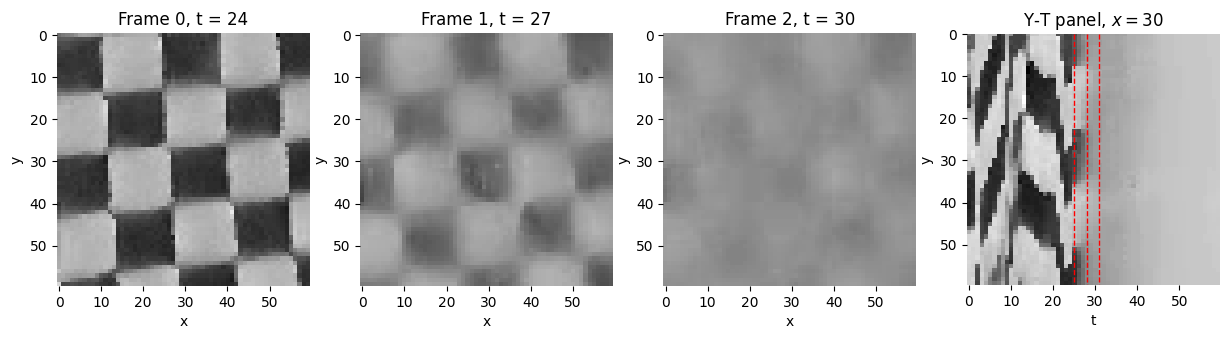

In [174]:
from matplotlib import pyplot as plt

FRAMES = [299, 302, 305]
SIZE = 60
START = 275
STOP = 335


fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for ax in axs:
    for side in ['top','right','bottom','left']:
        ax.spines[side].set_visible(False)
    # ax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False, labelleft=False)

for i, frame in enumerate(FRAMES):
    axs[i].imshow(reflective_ours[frame, 0:SIZE, 0:SIZE], cmap='gray', vmin=0, vmax=255)
    axs[i].set_title(f"Frame {i}, t = {frame - START}")
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')

axs[3].imshow(reflective_ours[START: STOP, SIZE // 2, 0:SIZE].T, cmap='gray')
axs[3].vlines([x - START + 1 for x in FRAMES], 0, SIZE, 'red', '--', linewidth=1)
axs[3].set_ylim([SIZE-0.5, 0])
axs[3].set_title(f'Y-T panel, $x = 30$')
axs[3].set_xlabel('t')
axs[3].set_ylabel('y')

plt.savefig('results/vanishing.png', bbox_inches='tight')

(89.5, 0.0)

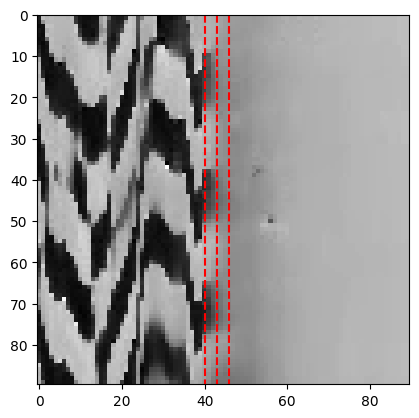

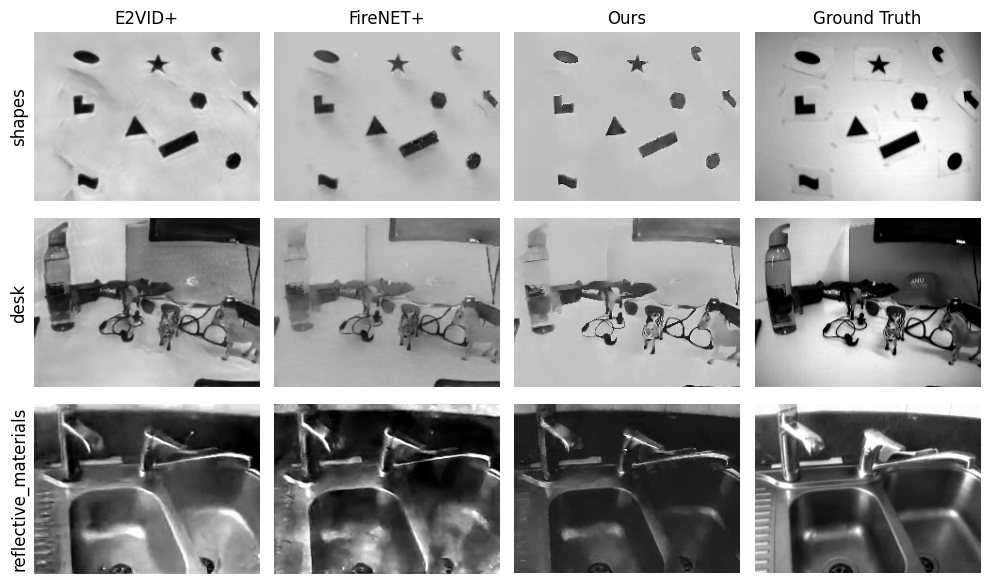

In [41]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(3, 4, figsize=(10, 6))

for ax in axs.flatten():
    for side in ['top','right','bottom','left']:
        ax.spines[side].set_visible(False)
    ax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False, labelleft=False)
    # Set y label fontsize to same as title
    ax.yaxis.label.set_size(12)
    # ax.axis('off')
# plt.tight_layout()
# Add titles
# Add row descriptions
axs[0,0].imshow(shapes_e2vid,cmap='gray')
axs[0,0].set_title("E2VID+")
axs[0,0].set_ylabel("shapes")

axs[0,1].imshow(shapes_fire,cmap='gray')
axs[0,1].set_title("FireNET+")
axs[0,2].imshow(shapes_ours, cmap='gray')
axs[0,2].set_title("Ours")
axs[0,3].imshow(shapes_gt, cmap='gray')
axs[0,3].set_title("Ground Truth")

axs[1,0].imshow(desk_e2vid, cmap='gray')
axs[1,0].set_ylabel("desk")
axs[1,1].imshow(desk_fire, cmap='gray')
axs[1,2].imshow(desk_ours, cmap='gray')
axs[1,3].imshow(desk_gt, cmap='gray')

axs[2,0].imshow(reflective_e2vid, cmap='gray')
axs[2,0].set_ylabel("reflective_materials")
axs[2,1].imshow(reflective_fire, cmap='gray')
axs[2,2].imshow(reflective_ours, cmap='gray')
axs[2,3].imshow(reflective_gt, cmap='gray')

plt.tight_layout()
plt.savefig('results/for_comparison.png', bbox_inches='tight', dpi=300)

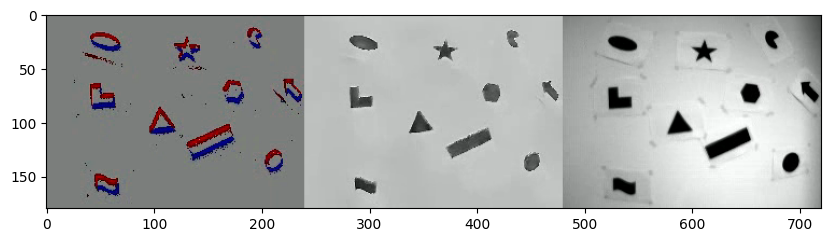

In [60]:
plt.figure(figsize=(10,5))
plt.imshow(shapes_ours[200])

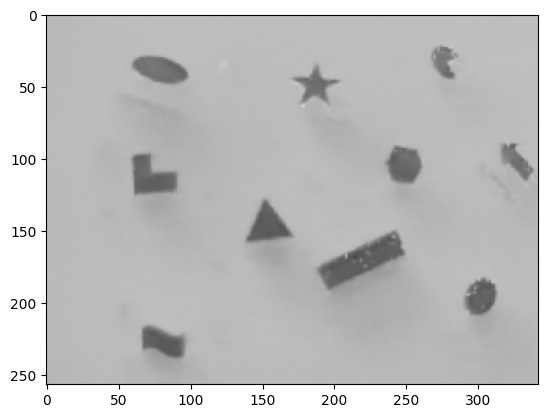

In [8]:
from matplotlib import pyplot as plt

plt.imshow(desk_e2vid)
plt.imshow(shapes_fire)